In [8]:
#load important libraries
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
#import matplotlib.pyplot as plt

In [9]:
#load data
#df = pd.read_csv('adult.data',header=None, sep="\t", na_values=' ?')
df = pd.read_csv('adult.csv')
# summarize the shape of the dataset
print(df.shape)


(32560, 15)


In [10]:
#add heading to columns
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df.head()
print(df)
print(df.dtypes)


       age          workclass  fnlwgt    education  education-num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

In [11]:
#Checking for null values and datatypes for the columns
df.isin(['?']).sum(axis=0)
print(df.shape)
print(df.columns)
print(df.info())


(32560, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-

In [12]:
# Replacing null values  for numeric columns  using median 

median = df['capital-gain'].median()
df['capital-gain'].fillna(median, inplace=True)
median2 = df['hours-per-week'].median()
df['hours-per-week'].fillna(median, inplace=True)



In [13]:
# summarize the class distribution of income
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))


Class= <=50K, Count=24719, Percentage=75.918%
Class= >50K, Count=7841, Percentage=24.082%


In [14]:
#filtering noisy data
df = df[df["workclass"] != ' ?']
df = df[df["education"] != ' ?']
df = df[df["marital-status"] != ' ?']
df = df[df["occupation"] != ' ?']
df = df[df["relationship"] != ' ?']
df = df[df["race"] != ' ?']
df = df[df["sex"] != ' ?']
df = df[df["native-country"] != ' ?']
#replacing ‘? ‘  with  null values 
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

#dropping rows with null values
df.dropna(how='any',inplace=True)


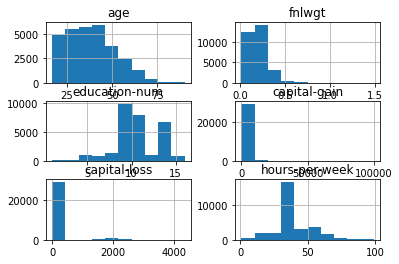

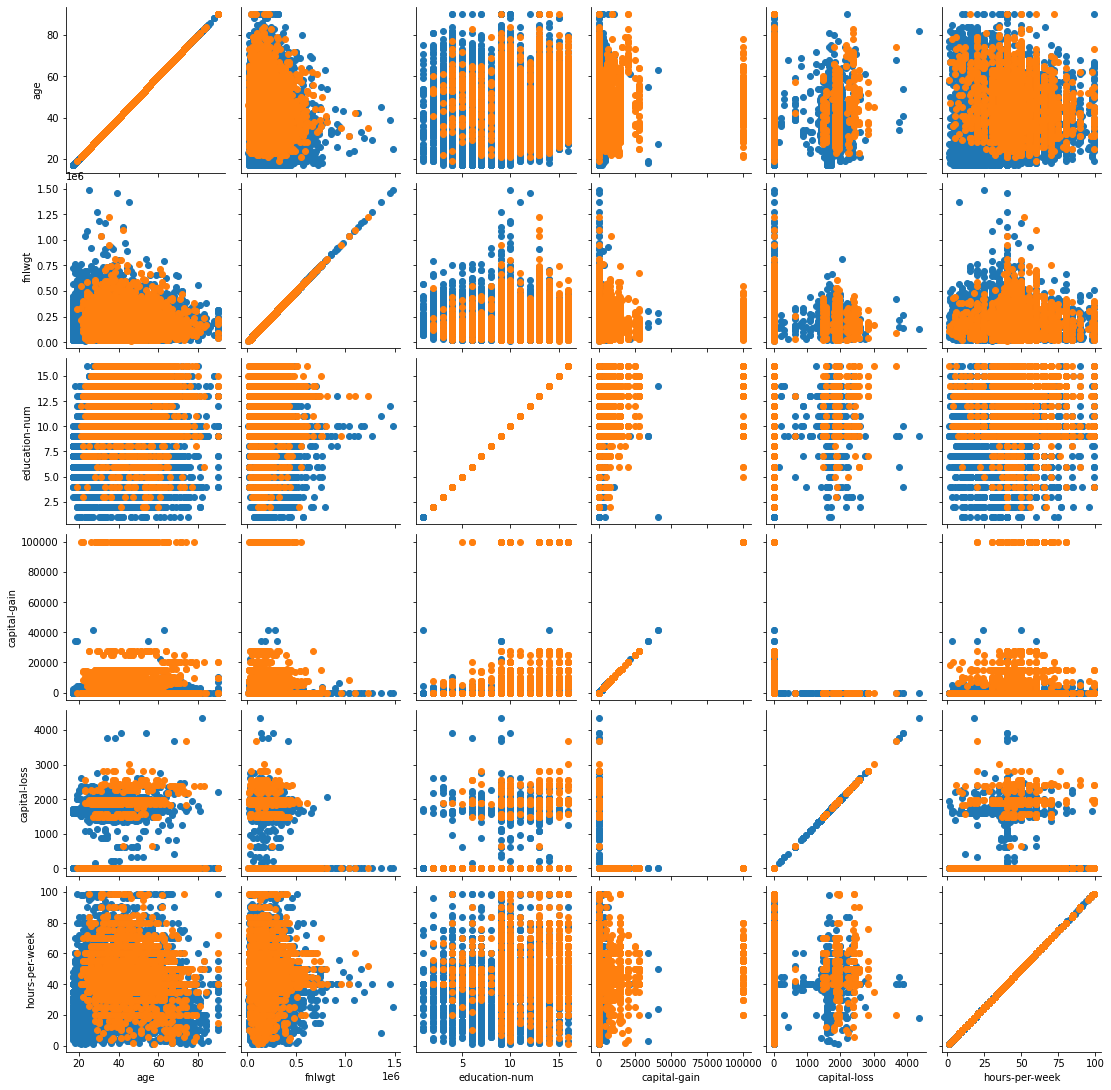

In [15]:
# select columns with numerical data types
num_ix = df.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = df[num_ix]
# create a histogram plot of each numeric variable
subset.hist()
pyplot.show()

 # Creating scatter plots for all pairs of variables.  
g = sns.PairGrid(data=df, hue='income')  
g.map(plt.scatter)


[Text(0.5, 1.0, 'age vs income'), Text(0.5, 0, 'income'), Text(0, 0.5, '')]

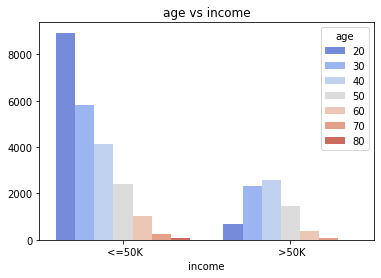

In [10]:
#Sorting the values of age
df_sort =df.sort_values('age', ascending=True)
#Bining the data for every 10 years
bins = [16.9, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
labels = [20,30,40,50,60,70, 80]
df_sort['age']= pd.cut(df_sort['age'], bins, labels= labels)
#Plotting the Age vs Income
sns.countplot(df['income'], palette='coolwarm', hue='age', data=df_sort).set(title='age vs income', xlabel='income', ylabel='')


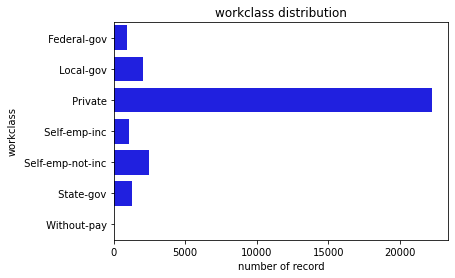

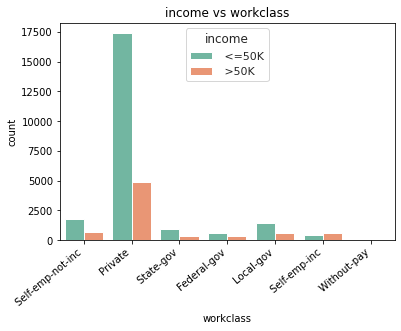

In [11]:
#df = pd.read_csv("adult.data", header=None, sep=", ")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = df[df["workclass"] != '?']
df = df.drop_duplicates()
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['income2'] = np.where(df['income'] == '>50K', 0, 1)
df_workclass=df.groupby(["workclass"])["workclass"].count().reset_index(name="number of record")
sns.barplot(x="number of record", y="workclass", data=df_workclass, label="Total", color="b")
plt.title('workclass distribution')
plt.show()
plt.title('income vs workclass')
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
g = sns.countplot(x="workclass",hue="income", data=df, palette="Set2",orient="h")
#sns.despine()
g = g.set_xticklabels(g.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()


In [12]:
#Grouping the education attributes
df.education = df.education.str.replace('Preschool', 'school')
df.education = df.education.str.replace('1st-4th', 'school')
df.education = df.education.str.replace('5th-6th', 'school')
df.education = df.education.str.replace('7th-8th', 'school')
df.education = df.education.str.replace('9th', 'school')
df.education = df.education.str.replace('10th', 'school')
df.education = df.education.str.replace('11th', 'school')
df.education = df.education.str.replace('12th', 'school')
df.education = df.education.str.replace('HS-grad', 'HS')
df.education = df.education.str.replace('Assoc-voc', 'Highier_ed')
df.education = df.education.str.replace('Assoc-acdm', 'Highier_ed')
df.education = df.education.str.replace('Prof-school', 'Prof-school')
df.education = df.education.str.replace('Some-college', 'Highier_ed')
df.education = df.education.str.replace('Bachelors', 'Bachelor')
df.education = df.education.str.replace('Masters', 'MSc')
df.education = df.education.str.replace('Doctorate', 'Doc')
df.head()
#df['education'].value_counts()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income2
0,50,Self-emp-not-inc,83311,Bachelor,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
1,38,Private,215646,HS,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
3,28,Private,338409,Bachelor,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
4,37,Private,284582,MSc,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1


<AxesSubplot:xlabel='education', ylabel='count'>

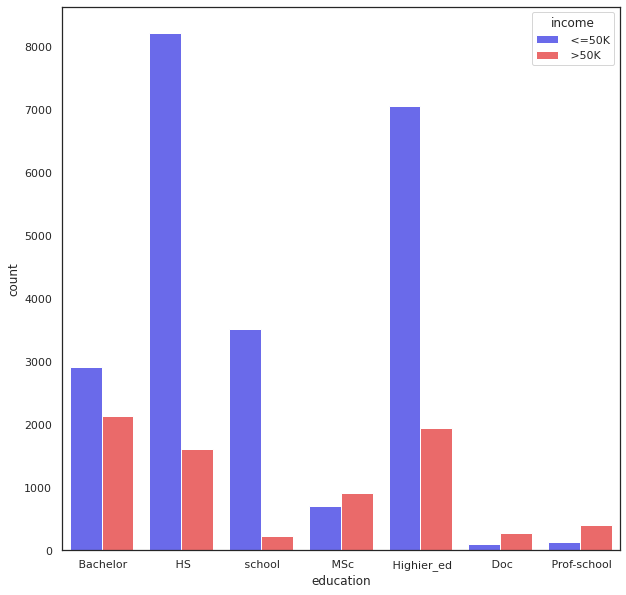

In [13]:
plt.figure(figsize=(10,10))

sns.countplot(df['education'], hue='income', data=df, palette='seismic')

In [14]:
#Dividing data frame among less or more than 50k
s='<=50K'
poor_df=df.loc[df['income'].str.lower().str.contains(s, case=False)]
poor_df['income']=0
r='>50K'
rich_df=df.loc[df['income'].str.lower().str.contains(r, case=False)]
rich_df['income']=1
#Grouping the values by income
poor_gr = poor_df.groupby('education').agg('count')
poor_gr.reset_index()
poor_gr = poor_gr.reset_index()
poor_gr.columns = ['education','age', 'Workclass', 'fnlwgt' ,'educatin-num','Maritual_status','occupation','relation','ace','Sex','Capital-gain','capital-loss','hours-per-week','native-country','income', 'income2']# change column names
rich_gr = rich_df.groupby('education').agg('count')
rich_gr.reset_index()
rich_gr = rich_gr.reset_index()
rich_gr.columns = ['education','age', 'Workclass', 'fnlwgt' ,'educatin-num','Maritual_status','occupation','relation','ace','Sex','Capital-gain','capital-loss','hours-per-week','native-country','income', 'income2']# change column names
print(poor_gr)
print(rich_gr)


      education   age  Workclass  fnlwgt  educatin-num  Maritual_status  \
0      Bachelor  2915       2915    2915          2915             2915   
1           Doc    95         95      95            95               95   
2            HS  8218       8218    8218          8218             8218   
3    Highier_ed  7049       7049    7049          7049             7049   
4           MSc   708        708     708           708              708   
5   Prof-school   136        136     136           136              136   
6        school  3511       3511    3511          3511             3511   

   occupation  relation   ace   Sex  Capital-gain  capital-loss  \
0        2915      2915  2915  2915          2915          2915   
1          95        95    95    95            95            95   
2        8218      8218  8218  8218          8218          8218   
3        7049      7049  7049  7049          7049          7049   
4         708       708   708   708           708           708 

/home/tasneem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/tasneem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


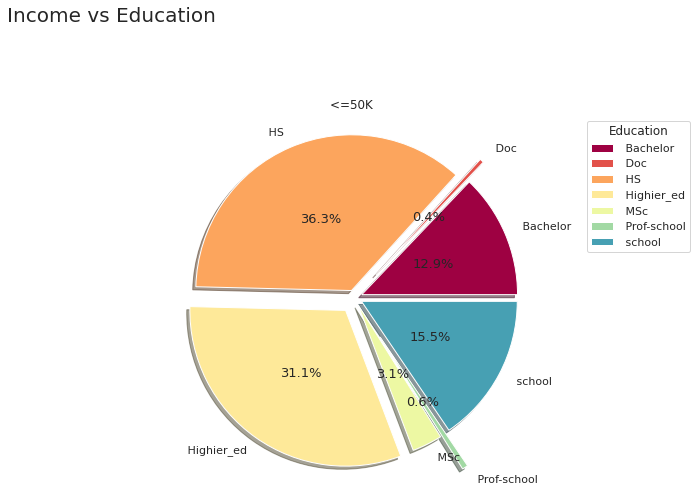

In [15]:
#poor_gr['education']
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
#credit https://matplotlib.org/devdocs/gallery/pie_and_polar_charts/pie_demo2.html#sphx-glr-gallery-pie-and-polar-charts-pie-demo2-py

plt.rc('axes', labelsize=15)
plt.rcParams.update({'font.size':13})
poor_labels = poor_gr.education



# Make square figures and axes
plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

explode=[.05,.2,.05,.1,.05,.3,.05]
plt.subplot(the_grid[0, 1], aspect=5, title='<=50K ')

poor_pie = plt.pie(poor_gr['income'], labels=poor_labels,explode=explode, autopct='%1.1f%%', pctdistance=0.5,shadow=True, colors=colors, labeldistance=1.1)


plt.axis('equal')
plt.legend( title='Education',loc='upper right', bbox_to_anchor=(1,0,0.4,1))
plt.suptitle('Income vs Education', fontsize=20)


plt.show()

<AxesSubplot:xlabel='marital-status'>

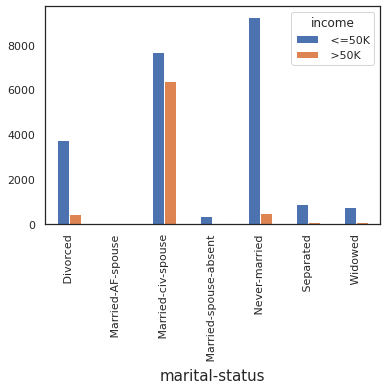

In [35]:
df1 = df.groupby(['marital-status','income']).size()
df1 = df1.unstack()
df1.plot(kind='bar')


Text(0.5, 1.0, 'Relationship Vs Income')

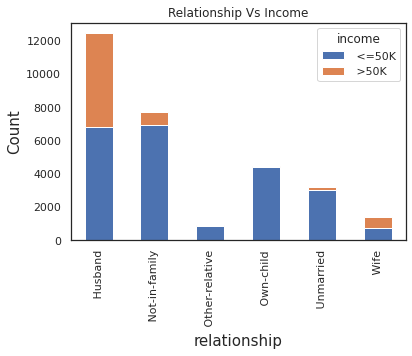

In [32]:
pt = df[['relationship','income']].pivot_table(index='relationship', columns='income', 
                                              aggfunc=len, fill_value=0) 
pt.plot.bar(stacked=True, edgecolor='white')
plt.ylabel('Count')
plt.title('Relationship Vs Income')



         income
sex            
 Female   10771
 Male     21789
income    int64
dtype: object


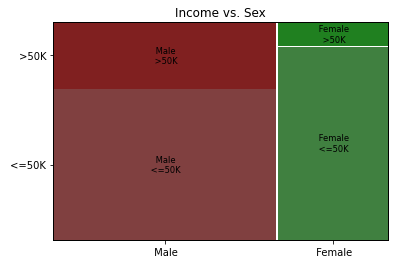

In [7]:
df2 = pd.read_csv('adult.csv')
#df = pd.read_csv('adult.data',header=None, sep="\t")
df2.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df2.head()
df_gender=df2[['sex', 'income']].groupby("sex").count()
print(df_gender)
print(df_gender.dtypes)
mosaic(df2, ['sex', 'income'],title="Income vs. Sex")
plt.show()


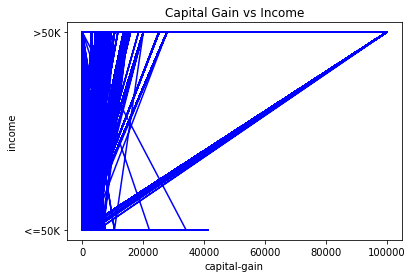

In [17]:
#Line Chart for Capital Gain vs income
Capital = df['capital-gain']
income = df['income']
plt.plot(Capital, income, color='Blue')
plt.xlabel('capital-gain')
plt.ylabel('income')
plt.title('Capital Gain vs Income')
plt.show()
 


Text(0.5, 1.0, 'HoursPerWeek Vs Income')

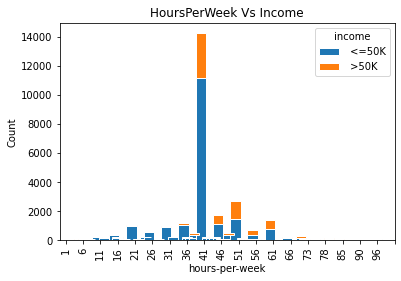

In [22]:
pt = df[['hours-per-week','income']].pivot_table(index='hours-per-week', columns='income', 
                                              aggfunc=len, fill_value=0) 
pt.plot.bar(stacked=True, width=3.00, edgecolor='white')
plt.xticks(np.arange(0, 96, 5)) 
plt.ylabel('Count')
plt.title('HoursPerWeek Vs Income')


native-country
 Cambodia                         18
 Canada                          107
 China                            68
 Columbia                         56
 Cuba                             92
 Dominican-Republic               67
 Ecuador                          27
 El-Salvador                     100
 England                          86
 France                           27
 Germany                         128
 Greece                           29
 Guatemala                        63
 Haiti                            42
 Holand-Netherlands                1
 Honduras                         12
 Hong                             19
 Hungary                          13
 India                           100
 Iran                             42
 Ireland                          24
 Italy                            68
 Jamaica                          80
 Japan                            59
 Laos                             17
 Mexico                          610
 Nicaragua             

<AxesSubplot:xlabel='native-country'>

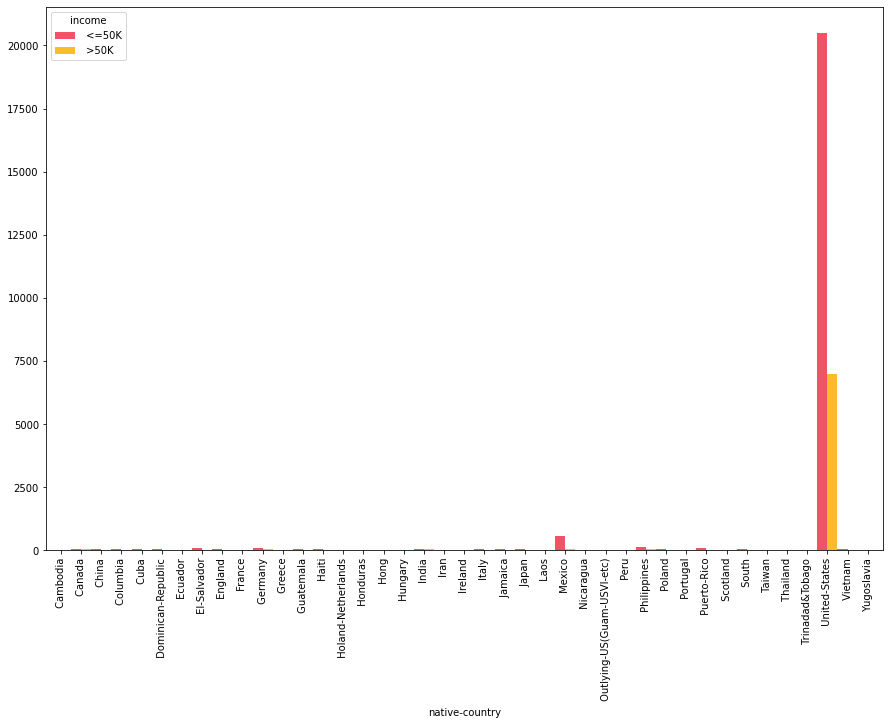

In [24]:
#load important libraries
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt

#load data
df2 = pd.read_csv('adult.csv')
#df = pd.read_csv('adult.data',header=None, sep="\t")
#print(df)

#add heading to columns
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df.head()
df = df[df["native-country"] != ' ?']
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df.dropna(how='any',inplace=True)
print(df['native-country'].groupby([df['native-country']]).count())
grouped_single = df.groupby(['native-country', 'income'], as_index=False).agg({'age': ['count']})
grouped_single.columns = list(map(''.join, grouped_single.columns.values))
grouped_single.columns = grouped_single.columns.to_flat_index()

grouped_single = grouped_single.pivot(index='native-country', columns='income', values='agecount')
#plot bar graph
grouped_single.plot.bar(color=[(240/255,83/255,101/255), (250/255,188/255,42/255)],figsize=(15,10),width=1)


<AxesSubplot:xlabel='native-country'>

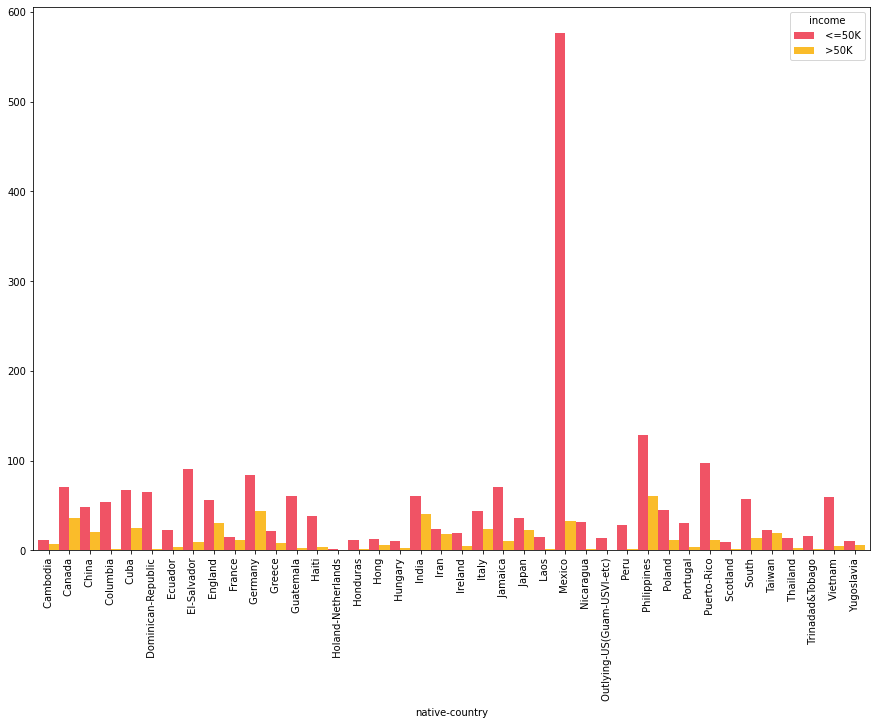

In [25]:
df = df[df["native-country"] != ' United-States']
grouped_single = df.groupby(['native-country', 'income'], as_index=False).agg({'age': ['count']})
grouped_single.columns = list(map(''.join, grouped_single.columns.values))
grouped_single.columns = grouped_single.columns.to_flat_index()
grouped_single = grouped_single.pivot(index='native-country', columns='income', values='agecount')
#plot bar graph
grouped_single.plot.bar(color=[(240/255,83/255,101/255), (250/255,188/255,42/255)],figsize=(15,10),width=1)

